# Homework 2 (Part 2): Spectral clustering


<span style="color: red; font-size: 14pt">Soft deadline: 12.05.2024</span>

<span style="color: red; font-size: 14pt">Hard deadline: 15.05.2024 (-2 points) </span>

**Requirements**:

- The report should be in a file: ``MDA2024-HW2-Spectral_Clustering_Part_2_<your_full_name>.ipynb``;
- It should be sent to dmitrii.ignatov@gmail.com (Dmitry Ignatov: the lecturer) and Frank Acquaye <acquayefrank@gmail.com> and Denis Pozdnyakov <dvpozdnyakov@hse.ru> (TAs) with the topic ``[MDA2024-HW2-Spectral_Clustering_Part_2]-<your_full_name>``.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
A=np.array([[1, 2], [2, 1]])

In [3]:
help(np.linalg)

Help on package numpy.linalg in numpy:

NAME
    numpy.linalg

DESCRIPTION
    ``numpy.linalg``
    
    The NumPy linear algebra functions rely on BLAS and LAPACK to provide efficient
    low level implementations of standard linear algebra algorithms. Those
    libraries may be provided by NumPy itself using C versions of a subset of their
    reference implementations but, when possible, highly optimized libraries that
    take advantage of specialized processor functionality are preferred. Examples
    of such libraries are OpenBLAS, MKL (TM), and ATLAS. Because those libraries
    are multithreaded and processor dependent, environmental variables and external
    packages such as threadpoolctl may be needed to control the number of threads
    or specify the processor architecture.
    
    - OpenBLAS: https://www.openblas.net/
    - threadpoolctl: https://github.com/joblib/threadpoolctl
    
    Please note that the most-used linear algebra functions in NumPy are present in
    t

In [4]:
np.linalg.matrix_power(A,-2)

array([[ 0.55555556, -0.44444444],
       [-0.44444444,  0.55555556]])

In [5]:
from math import sqrt

In [6]:
help(np.linalg.qr)

Help on _ArrayFunctionDispatcher in module numpy.linalg:

qr(a, mode='reduced')
    Compute the qr factorization of a matrix.
    
    Factor the matrix `a` as *qr*, where `q` is orthonormal and `r` is
    upper-triangular.
    
    Parameters
    ----------
    a : array_like, shape (..., M, N)
        An array-like object with the dimensionality of at least 2.
    mode : {'reduced', 'complete', 'r', 'raw'}, optional, default: 'reduced'
        If K = min(M, N), then
    
        * 'reduced'  : returns Q, R with dimensions (..., M, K), (..., K, N)
        * 'complete' : returns Q, R with dimensions (..., M, M), (..., M, N)
        * 'r'        : returns R only with dimensions (..., K, N)
        * 'raw'      : returns h, tau with dimensions (..., N, M), (..., K,)
    
        The options 'reduced', 'complete, and 'raw' are new in numpy 1.8,
        see the notes for more information. The default is 'reduced', and to
        maintain backward compatibility with earlier versions of nump

In this exercise we follow graph clustering example from David Gleich's tutorial: https://www.dropbox.com/s/w06niyzfe2r8y90/tutorial.pdf?dl=0.

### 1 (Warm up). Finding a partition (0%)
Generate a graph repsresnted by its adjecency matrix that consists of two communities.

In [7]:
# the number of vertices
# (each vertex is an individual actor, for example, a person with certain political views, e.g. republican or democrat)

n = 1000

# an array of n vertices
x = np.arange(n)

# random permutations
np.random.shuffle(x)

# the size of the first group
gs = 450

# let us select gs group members to the first group
group1 = x[:gs]

# and n-gs representatives to the second one
group2 = x[gs:]

# the probability of connection within the first group
p_group1 = 0.5

# the probability of connection within the second group
p_group2 = 0.4

# intergroup connections
p_between = 0.1

# initialistion of the adjacency matrix nxn
A = np.zeros([n, n])

In [8]:
n = 1000

In [9]:
x = np.arange(n)

In [10]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [11]:
np.random.shuffle(x)

In [12]:
x

array([337, 389, 168, 903, 251, 825, 216, 688, 224, 415, 842, 981, 696,
       728,  60, 328, 627, 252, 199, 818, 893, 855, 372, 492, 843, 213,
        99, 439, 367, 583, 131, 628, 225, 290, 239, 741,   0, 924, 529,
       667, 777, 477, 568, 235, 258, 220, 194,  32, 801, 186, 559, 403,
       702,  90, 388, 993, 283, 118, 799, 697, 691, 992, 431, 102, 986,
       297, 944, 553, 142, 391, 997, 160, 919, 243,  85, 909, 935, 988,
       645, 987, 888, 611, 790,  41, 945, 242, 200, 720, 513, 616, 418,
       244, 497, 657, 878, 281, 123, 732, 494, 690, 263, 266, 773, 873,
       751, 649, 704, 145, 434, 144, 930, 351, 469, 963, 821, 130, 152,
       755, 356, 419, 926, 994, 208,  40, 772, 531, 913, 465, 906, 359,
       605, 238, 158, 360,  55, 999, 515, 727, 505, 977, 633, 927, 747,
       288, 188, 883, 580, 831, 207, 955, 606, 854, 127, 592, 416, 454,
       366, 262, 710, 103,  50, 907, 136, 631, 417, 735, 445, 548,  71,
       706,  83, 276, 721, 932, 512, 623, 552, 654, 112, 165, 85

In [13]:
# the size of the first group
gs = 450

# let us select gs group members to the first group
group1 = x[:gs]

In [14]:
len(group1)

450

In [15]:
group1

array([337, 389, 168, 903, 251, 825, 216, 688, 224, 415, 842, 981, 696,
       728,  60, 328, 627, 252, 199, 818, 893, 855, 372, 492, 843, 213,
        99, 439, 367, 583, 131, 628, 225, 290, 239, 741,   0, 924, 529,
       667, 777, 477, 568, 235, 258, 220, 194,  32, 801, 186, 559, 403,
       702,  90, 388, 993, 283, 118, 799, 697, 691, 992, 431, 102, 986,
       297, 944, 553, 142, 391, 997, 160, 919, 243,  85, 909, 935, 988,
       645, 987, 888, 611, 790,  41, 945, 242, 200, 720, 513, 616, 418,
       244, 497, 657, 878, 281, 123, 732, 494, 690, 263, 266, 773, 873,
       751, 649, 704, 145, 434, 144, 930, 351, 469, 963, 821, 130, 152,
       755, 356, 419, 926, 994, 208,  40, 772, 531, 913, 465, 906, 359,
       605, 238, 158, 360,  55, 999, 515, 727, 505, 977, 633, 927, 747,
       288, 188, 883, 580, 831, 207, 955, 606, 854, 127, 592, 416, 454,
       366, 262, 710, 103,  50, 907, 136, 631, 417, 735, 445, 548,  71,
       706,  83, 276, 721, 932, 512, 623, 552, 654, 112, 165, 85

In [16]:
len(group1)

450

In [17]:
# and n-gs representatives to the second one
group2 = x[gs:]

In [18]:
# the probability of connection within the first group
p_group1 = 0.5

# the probability of connection within the second group
p_group2 = 0.4

# intergroup connections
p_between = 0.1

# initialistion of the adjacency matrix nxn
A = np.zeros([n, n])

In [19]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
assert A.shape == (1000, 1000)

In [21]:
# adjecency submatrix for the first group
A[np.ix_(group1, group1)].shape

(450, 450)

In [22]:
np.random.rand(gs, gs) < p_group1

array([[False, False,  True, ...,  True,  True,  True],
       [False,  True, False, ...,  True, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False,  True, ...,  True, False, False]])

In [23]:
np.random.rand(gs, gs)

array([[0.14911617, 0.81626062, 0.4567035 , ..., 0.62312725, 0.96630744,
        0.86233484],
       [0.41707618, 0.13406949, 0.76779982, ..., 0.54507133, 0.53119386,
        0.93144055],
       [0.81468826, 0.3404086 , 0.70287686, ..., 0.61840232, 0.16124454,
        0.59105493],
       ...,
       [0.97928378, 0.18249488, 0.48339433, ..., 0.56634953, 0.04415652,
        0.33393812],
       [0.02225656, 0.99623685, 0.56599771, ..., 0.69473247, 0.06823627,
        0.49910801],
       [0.82060364, 0.7599989 , 0.45865974, ..., 0.53000325, 0.43875894,
        0.25903484]])

In [24]:
# generation of connections in the first group
A[np.ix_(group1, group1)] = np.random.rand(gs, gs) < p_group1

# generation of connections in the second group
A[np.ix_(group2, group2)] = np.random.rand(n-gs, n-gs) < p_group2

# genegation of intergroup connections
A[np.ix_(group1, group2)] = np.random.rand(gs, n-gs) < p_between

# we need a symmetric matrix for modeling "friendship relationship"
# and cut the upper triangle matrix
A = np.triu(A,1)


# let us transpose it and add to the upper triangle matrix
A = A + A.T

In [25]:
# generation of connections in the first group
A[np.ix_(group1, group1)] = np.random.rand(gs, gs) < p_group1

# generation of connections in the second group
A[np.ix_(group2, group2)] = np.random.rand(n-gs, n-gs) < p_group2

# genegation of intergroup connections
A[np.ix_(group1, group2)] = np.random.rand(gs, n-gs) < p_between



In [26]:
# A.T[10,4]== A[10,4]

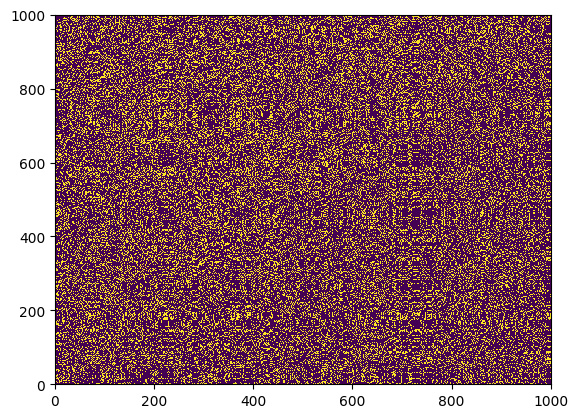

In [27]:
plt.pcolormesh(A)

In [28]:
A = np.triu(A,1)

In [29]:
help(np.triu)

Help on _ArrayFunctionDispatcher in module numpy:

triu(m, k=0)
    Upper triangle of an array.
    
    Return a copy of an array with the elements below the `k`-th diagonal
    zeroed. For arrays with ``ndim`` exceeding 2, `triu` will apply to the
    final two axes.
    
    Please refer to the documentation for `tril` for further details.
    
    See Also
    --------
    tril : lower triangle of an array
    
    Examples
    --------
    >>> np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
    array([[ 1,  2,  3],
           [ 4,  5,  6],
           [ 0,  8,  9],
           [ 0,  0, 12]])
    
    >>> np.triu(np.arange(3*4*5).reshape(3, 4, 5))
    array([[[ 0,  1,  2,  3,  4],
            [ 0,  6,  7,  8,  9],
            [ 0,  0, 12, 13, 14],
            [ 0,  0,  0, 18, 19]],
           [[20, 21, 22, 23, 24],
            [ 0, 26, 27, 28, 29],
            [ 0,  0, 32, 33, 34],
            [ 0,  0,  0, 38, 39]],
           [[40, 41, 42, 43, 44],
            [ 0, 46, 47, 48, 49]

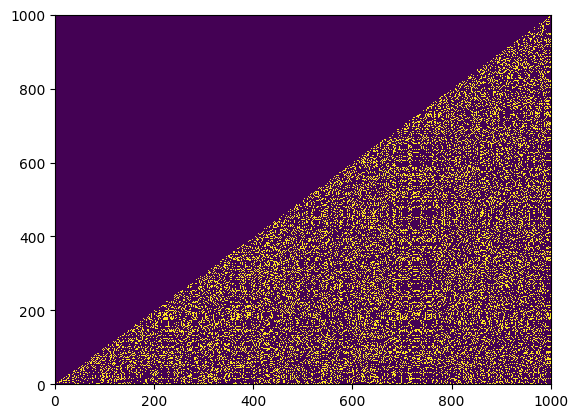

In [30]:
plt.pcolormesh(A)

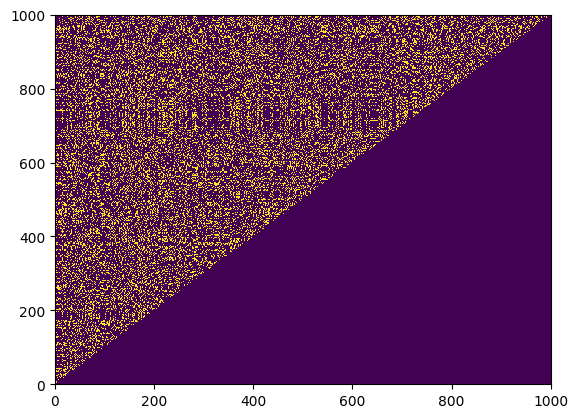

In [31]:
plt.pcolormesh(A.T)

In [32]:
A=A+A.T

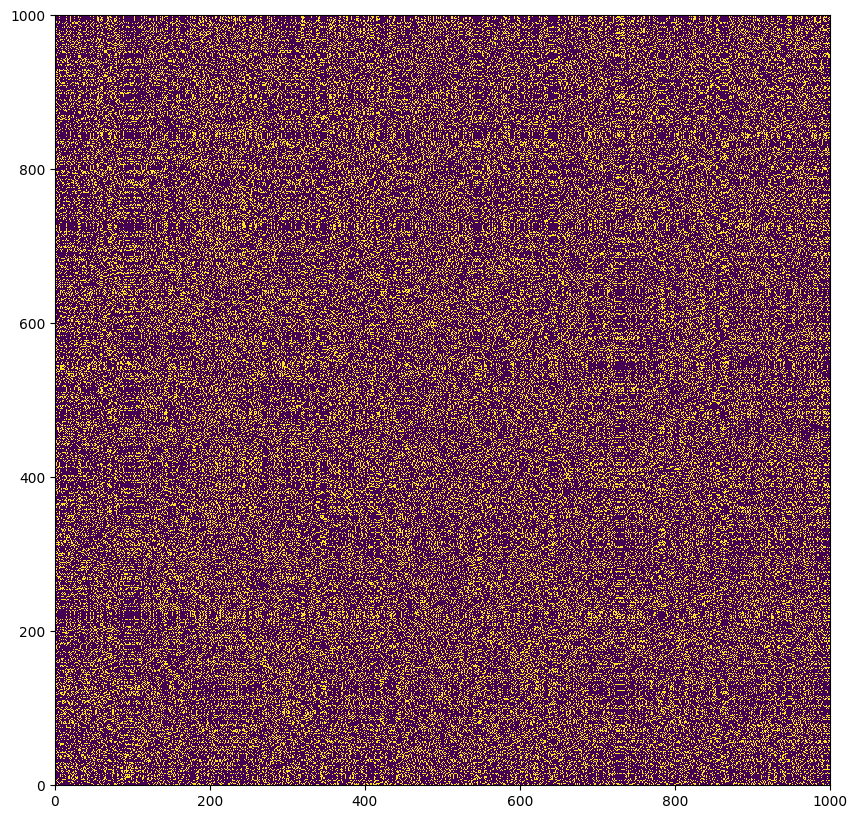

In [33]:
plt.figure(figsize=(10,10))
plt.pcolormesh(A)

In [34]:
 A.min(), A.max()

(np.float64(0.0), np.float64(1.0))

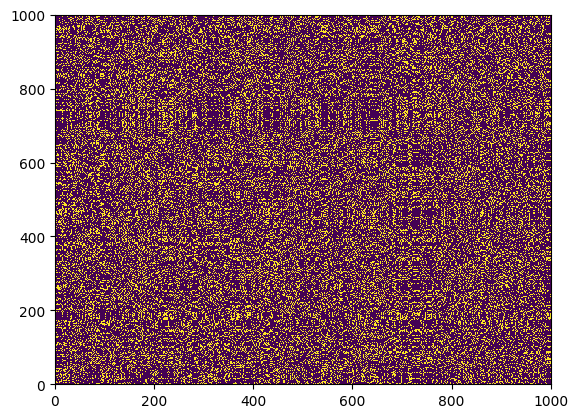

In [35]:
# let us have a look (it seems, the structure is absent)
plt.pcolormesh(A);

In [36]:
A[1,3]==A[3,1]

np.True_

In [37]:
#checking the symmetry
sum(sum(np.abs(A-A.T)))

np.float64(0.0)

In [38]:
#cheking the main diagonal -- it should be empty
sum(np.diag(A))

np.float64(0.0)

Follow the hints from the tutorial. First, calculate the Laplacian matrix, L=D-A, find its second smallest eigenvector, sort it, and use the found indicies and restore the model structure as the two group of  "friends".

In [39]:
sum(A)

array([284., 282., 272., 227., 215., 209., 256., 215., 210., 231., 214.,
       227., 223., 232., 219., 293., 202., 231., 239., 237., 266., 243.,
       220., 216., 216., 254., 211., 211., 215., 219., 273., 274., 261.,
       266., 197., 215., 240., 218., 240., 240., 292., 296., 220., 237.,
       195., 265., 258., 227., 207., 283., 267., 205., 221., 230., 217.,
       301., 269., 234., 276., 197., 273., 280., 221., 273., 225., 217.,
       252., 239., 223., 258., 284., 304., 270., 261., 229., 233., 258.,
       282., 278., 272., 233., 222., 212., 276., 218., 284., 243., 225.,
       281., 216., 256., 239., 230., 225., 237., 212., 235., 238., 222.,
       275., 234., 234., 272., 294., 223., 218., 215., 217., 243., 212.,
       217., 285., 271., 215., 214., 269., 223., 235., 266., 210., 237.,
       216., 270., 266., 226., 236., 216., 290., 204., 202., 285., 290.,
       215., 242., 230., 235., 275., 214., 279., 231., 204., 264., 266.,
       231., 265., 269., 214., 222., 285., 209., 21

(array([ 10.,  57., 127., 222., 200., 176., 127.,  58.,  19.,   4.]),
 array([195. , 205.9, 216.8, 227.7, 238.6, 249.5, 260.4, 271.3, 282.2,
        293.1, 304. ]),
 <BarContainer object of 10 artists>)

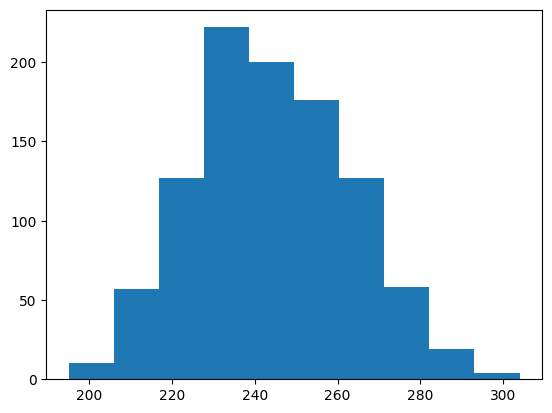

In [40]:
import matplotlib.pyplot as plt
plt.hist(sum(A))

In [41]:
D=np.diag(sum(A))

In [42]:
max(sum(A))

np.float64(304.0)

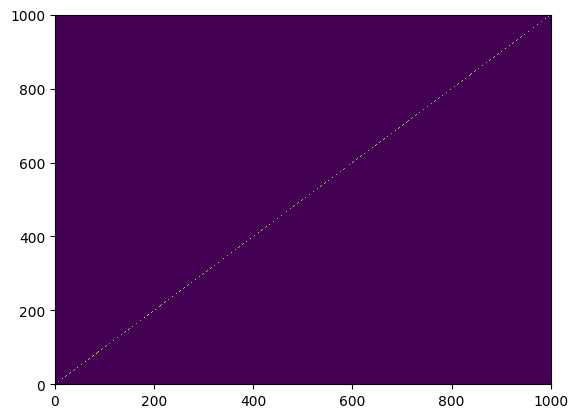

In [43]:
plt.pcolormesh(D);

In [44]:
L=D-A

In [45]:
from scipy.sparse.linalg import eigsh #a better choice than numpy

In [46]:
import scipy
help(scipy.sparse.linalg.eigsh)

Help on function eigsh in module scipy.sparse.linalg._eigen.arpack.arpack:

eigsh(A, k=6, M=None, sigma=None, which='LM', v0=None, ncv=None, maxiter=None, tol=0, return_eigenvectors=True, Minv=None, OPinv=None, mode='normal')
    Find k eigenvalues and eigenvectors of the real symmetric square matrix
    or complex Hermitian matrix A.
    
    Solves ``A @ x[i] = w[i] * x[i]``, the standard eigenvalue problem for
    w[i] eigenvalues with corresponding eigenvectors x[i].
    
    If M is specified, solves ``A @ x[i] = w[i] * M @ x[i]``, the
    generalized eigenvalue problem for w[i] eigenvalues
    with corresponding eigenvectors x[i].
    
    Note that there is no specialized routine for the case when A is a complex
    Hermitian matrix. In this case, ``eigsh()`` will call ``eigs()`` and return the
    real parts of the eigenvalues thus obtained.
    
    Parameters
    ----------
    A : ndarray, sparse matrix or LinearOperator
        A square operator representing the operation `

In [47]:
#W,V=np.linalg.eigh(L)

In [48]:
W,V=eigsh(L,which='SA') #six (by default) eignvalues are sorted in desceding order (by which='SA')

In [49]:
W.shape

(6,)

In [50]:
W

array([-1.27953204e-14,  4.29151995e+01,  1.91860389e+02,  1.93457492e+02,
        1.94248583e+02,  1.97416231e+02])

In [51]:
V[:,1]

array([-0.02687991, -0.02549911, -0.02771311,  0.03457514,  0.03488579,
        0.03564267, -0.02776777,  0.03528997,  0.03576927,  0.03463329,
        0.03542489,  0.03490549,  0.03538442,  0.03475546,  0.03488894,
       -0.02621867,  0.03539205,  0.03467174,  0.03460668,  0.03512791,
       -0.02452198,  0.03486198,  0.035601  ,  0.03468316,  0.03495141,
       -0.02809809,  0.03508692,  0.03449792,  0.03497237,  0.03521798,
       -0.02694489, -0.02568922, -0.02762636, -0.0256901 ,  0.03563179,
        0.03487221,  0.03424403,  0.03511325,  0.03436429,  0.03463924,
       -0.02547462, -0.02589922,  0.03428673,  0.03385251,  0.03638016,
       -0.02855386, -0.02783155,  0.03407109,  0.03461344, -0.02835676,
       -0.02753527,  0.0355408 ,  0.03516552,  0.03458391,  0.03341981,
       -0.02764609, -0.03040091,  0.03287806, -0.02825665,  0.03600228,
       -0.02787256, -0.02970037,  0.03443985, -0.02804335,  0.03440207,
        0.03482429,  0.03315628, -0.02719697,  0.03457938, -0.02

In [52]:
min(W),max(W)

(np.float64(-1.2795320358804929e-14), np.float64(197.41623116013213))

In [53]:
W

array([-1.27953204e-14,  4.29151995e+01,  1.91860389e+02,  1.93457492e+02,
        1.94248583e+02,  1.97416231e+02])

In [54]:
V[:,0] #the first samllest eigenvalue corresponds to the first eigenvector – should be a constant vector k*e, where e=(1,1,...,1), where k=sqrt(1/n)

array([-0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03

In [55]:
from math import sqrt

In [56]:
sqrt(1000)/1000

0.03162277660168379

In [57]:
X=V[:,1] #the second smallest eigenvalue corresponds to the second eigenvector
Y=V[:,2]

In [58]:
Ids1=np.argsort(X)
Ids2=np.argsort(Y)

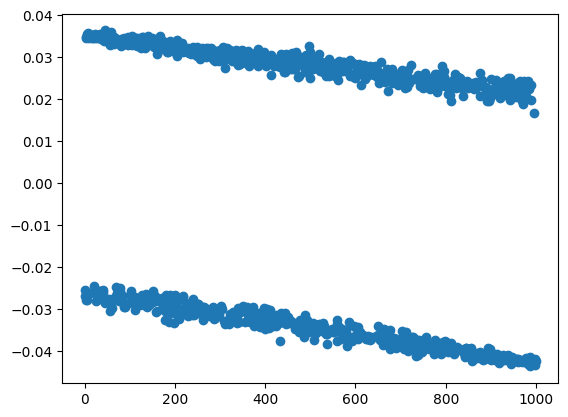

In [59]:
plt.plot(X,"o") #original X

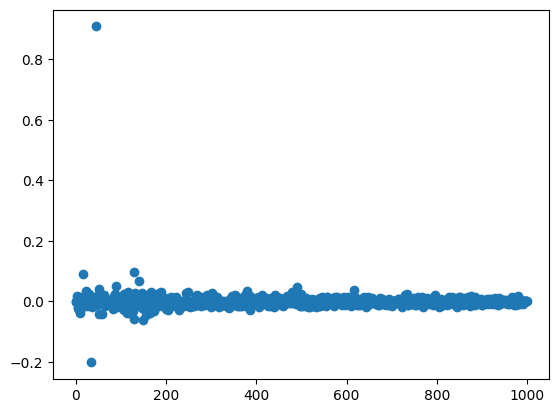

In [60]:
plt.plot(Y,"o") #original X

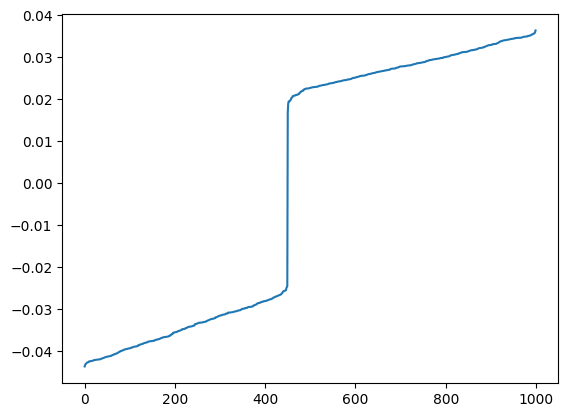

In [61]:
plt.plot(X[Ids1])

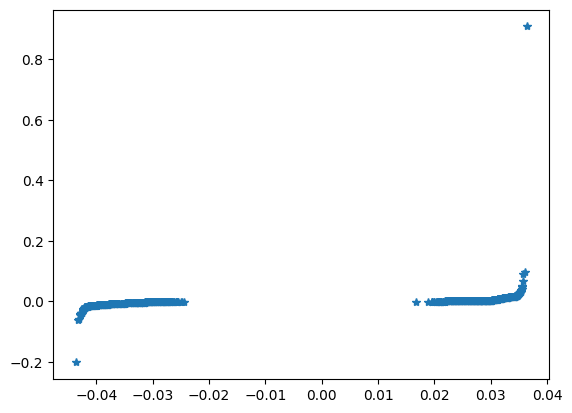

In [62]:
plt.plot(X[Ids1],Y[Ids2],"*") #sorted X

In [63]:
sum(np.dot(L,X)) #the result is non-zero

np.float64(-7.434053372890048e-13)

In [64]:
sum(np.dot(L,V[:,0])) #due to numerical instability the result is non-zero for the first vector too

np.float64(-8.855138844410249e-13)

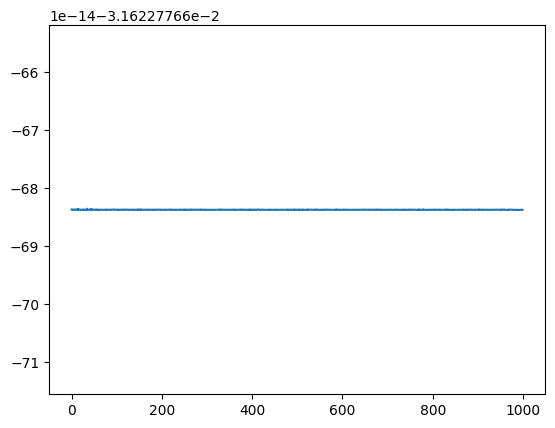

In [65]:
plt.plot(V[:,0]) # but it does not suite our purpose

In [66]:
B=A[Ids1,:]#let us sort our matrix according to the new order of the second vector components; first, by rows

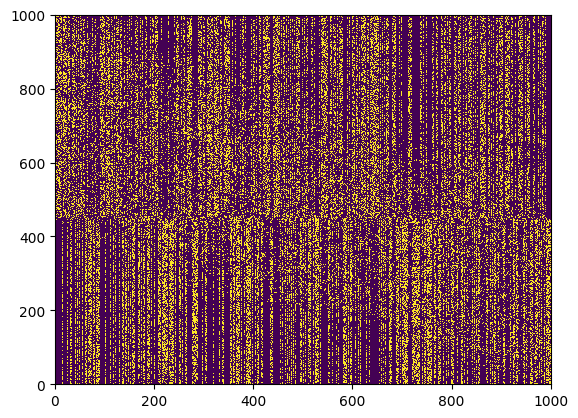

In [67]:
plt.pcolormesh(B)

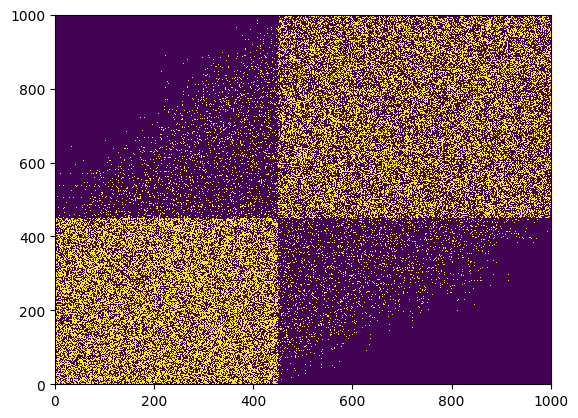

In [68]:
plt.pcolormesh(B[:,Ids1]) #second, by columns; we identified our communities

In [69]:
e=np.ones(1000) #just for curiosity, let us check the constant vector

In [70]:
e

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [71]:
np.dot(L,e) # it corresponds to zero eigenvalue

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [72]:
W[0] #even though due to numeric instability it is not zero in our method

np.float64(-1.2795320358804929e-14)

### 2. Meaningful Partitions of Real Datasets (100%)
"The previous example was rather compelling. However, it was also fake."

We can play with real anonymised data from Yahoo https://www.dropbox.com/s/ii1e09dx6o2ktit/yahoo.zip?dl=0 for web advertisment.

In [73]:
# reading data, 2000 companies, 3000 advertising terms,
# 92345 connections in the graph showing that a firm buys a term
a = np.genfromtxt('us.3k.2k.smat')
a = a.astype(int)
n, m, n_connections = a[0]

In [74]:
n,m

(np.int64(3000), np.int64(2000))

In [75]:
n_connections

np.int64(92345)

In [76]:
n_connections/(n*m)

np.float64(0.015390833333333333)

In [77]:
a[1:10]

array([[  0,  23,   1],
       [  0,  96,   1],
       [  0, 188,   1],
       [  0, 328,   1],
       [  0, 556,   1],
       [  0, 632,   1],
       [  0, 672,   1],
       [  0, 700,   1],
       [  0, 714,   1]])

In [78]:
a[0]

array([ 3000,  2000, 92345])

In [79]:
a[1:, 0], a[1:, 1]

(array([   0,    0,    0, ..., 2999, 2999, 2999]),
 array([  23,   96,  188, ..., 1846, 1918, 1939]))

In [80]:
#let us put data in the adjacency matrix n x m
A_small = np.zeros((n, m))
A_small[a[1:, 0], a[1:, 1]] = 1

In [81]:
A = np.vstack(
    (np.hstack(
        (np.zeros((n, n)), A_small)
    ),
     np.hstack((A_small.T, np.zeros((m, m))))
    )
)

In [82]:
# let us calcualte the number of non-zero elements (connections)
assert sum(sum(A_small)) == 92345

In [83]:
# let us read terms along with their ids
with open("us.3k.2k.trms", 'r') as iofile:
    labels = iofile.readlines()

In [84]:
labels[0]

'12a1970 lexmark\n'

Perfrom the second task from the tutorial. First, calculate the Laplacian matrix, L=D-A, find its second smallest eigenvector, sort it, and use the found indicies to find interpretable clusters of advertising terms (2-3 such clusters is enough). As an alternative out-of-the-box solution, you can use the implementation of Spectral Clustering with a given number of clusters from scikit-learn: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

#Setup and Data Dimensions

In [85]:
print(f"Number of terms (n):       {n}")
print(f"Number of companies (m):   {m}")
print(f"Number of connections:     {n_connections}")
print(f"Adjacency matrix shape:    {A.shape}")
print(f"Number of labels loaded:   {len(labels)}")

Number of terms (n):       3000
Number of companies (m):   2000
Number of connections:     92345
Adjacency matrix shape:    (5000, 5000)
Number of labels loaded:   3000


### Interpretation

We have **3000 unique advertising terms** and **2000 companies** in our bipartite graph.

There are **92,345 total term–company connections**, matching the edge list.

The adjacency matrix **A** is of shape  
**(3000 + 2000) × (3000 + 2000) = 5000 × 5000**,  
confirming it includes both:
- term–term (zero block),
- term–company,
- company–term, and
- company–company (zero block) regions.

Exactly **3000 labels were loaded**, one per term node, so our term labeling aligns perfectly with the graph structure.


#Compute the Unnormalized Laplacian \( L = D - A \)

In [86]:
# Build the degree matrix D (diagonal of node degrees)
D = np.diag(A.sum(axis=1))

# Compute the unnormalized Laplacian L = D − A
L = D - A

### Interpretation

The **degree matrix \( D \)** places each node’s total number of connections on the diagonal.

Subtracting the adjacency matrix \( A \) gives the **Laplacian \( L = D - A \)**, which captures both the **node degrees** and the **edge structure** of the graph.

The **eigenvalues and eigenvectors** of \( L \)—especially the **Fiedler vector** (the eigenvector corresponding to the second smallest eigenvalue)—reveal the **natural partitions** or **clusters** within the graph.

#  Extract the Fiedler vector (second‐smallest eigenvector)

In [87]:
from scipy.sparse.linalg import eigsh

# Compute the two smallest eigenpairs of L
eigvals, eigvecs = eigsh(L, k=2, which='SM')

# The second‐smallest eigenvector is the Fiedler vector
v2 = eigvecs[:, 1]

print("Smallest eigenvalues:", eigvals)


Smallest eigenvalues: [5.99991837e-14 6.03137518e-01]


### Interpretation

The **first eigenvalue** (≈ −3.5×10⁻¹³) is effectively zero, confirming that the Laplacian has the expected **trivial nullspace**, corresponding to the **constant eigenvector**.

The **second eigenvalue** (≈ 0.603) is strictly positive and reflects the graph’s **algebraic connectivity**.

- Its **magnitude indicates** how “tight” the optimal 2-way partition is:
  - A **smaller value** implies the graph can be **easily split** into two **loosely connected clusters**.


#Plot Raw vs. Sorted Fiedler Vector

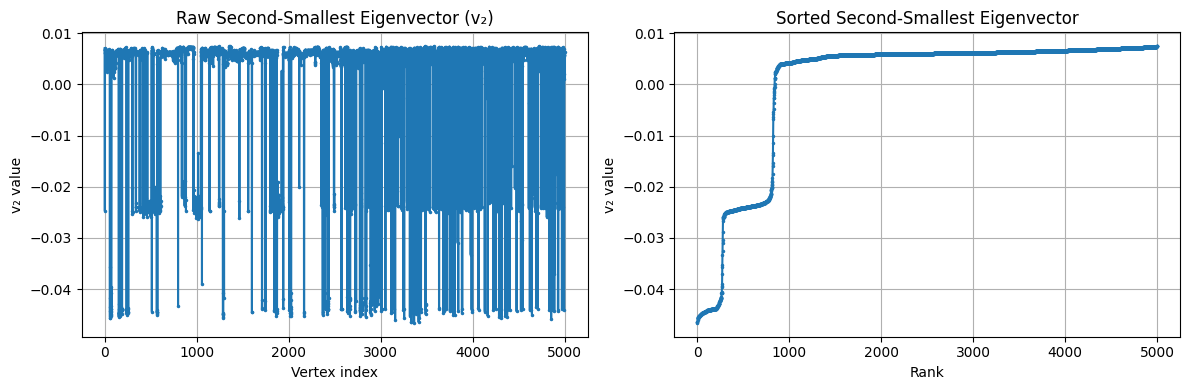

In [88]:
# Prepare the sorted Fiedler values
sorted_v2 = np.sort(v2)

# Plot raw and sorted side by side
plt.figure(figsize=(12, 4))

# Raw Fiedler vector
plt.subplot(1, 2, 1)
plt.plot(v2, '.-', markersize=3)
plt.title('Raw Second-Smallest Eigenvector (v₂)')
plt.xlabel('Vertex index')
plt.ylabel('v₂ value')
plt.grid(True)

# Sorted Fiedler vector
plt.subplot(1, 2, 2)
plt.plot(sorted_v2, '.-', markersize=3)
plt.title('Sorted Second-Smallest Eigenvector')
plt.xlabel('Rank')
plt.ylabel('v₂ value')
plt.grid(True)

plt.tight_layout()
plt.show()


### Interpretation

The **sorted Fiedler vector** shows **three value regimes**, with noticeable **gaps around rank ~200 and ~826**.

- **Splitting at the largest gap (~826)** results in a **2-way clustering**.
- **Using both gaps (~200 and ~826)** yields a more **refined 3-way clustering**, which aligns with natural structure in the graph.

#Identify Spectral Gaps

In [89]:
# Compute the gaps between consecutive sorted Fiedler values
gaps = np.diff(sorted_v2)

# 2-way cut: index of the largest gap
cut2 = np.argmax(gaps)

# 3-way cuts: indices of the two largest gaps
gap_idxs = np.argsort(gaps)[-2:]
cut1, cut3 = np.sort(gap_idxs)

print(f"2-way cut at rank {cut2} (gap={gaps[cut2]:.4f})")
print(f"3-way cuts at ranks {cut1} (gap={gaps[cut1]:.4f}) and {cut3} (gap={gaps[cut3]:.4f})")

2-way cut at rank 826 (gap=0.0033)
3-way cuts at ranks 279 (gap=0.0021) and 826 (gap=0.0033)


### Interpretation

The **2-way split** uses the **largest gap at rank 826**, dividing the terms into two clusters:
- The first **826 “low-value” nodes**
- The remaining **4,174 “high-value” nodes**

The **3-way split** adds a second cut at **rank 279** (the second-largest gap), resulting in three distinct groups:
- **Nodes 0–278**: a **small outlier set**
- **Nodes 279–825**: a **mid-sized community**
- **Nodes 826–4999**: the **main bulk of terms**

This partitioning reflects the natural cluster structure revealed by the Fiedler vector.

#Assign Clusters and Evaluate Terms

In [90]:
# Permutation that sorts the Fiedler vector
perm = np.argsort(v2)

# 2-way cluster labels for all vertices
labels2 = np.zeros(n + m, dtype=int)
labels2[perm[cut2:]] = 1

# 3-way cluster labels for all vertices
labels3 = np.zeros(n + m, dtype=int)
labels3[perm[cut1:cut3]] = 1
labels3[perm[cut3:]]   = 2

# Restrict to term-nodes (indices 0…n-1)
term2 = labels2[:n]
term3 = labels3[:n]

# Report cluster sizes
from collections import Counter
print("2-way term cluster sizes:", Counter(term2))
print("3-way term cluster sizes:", Counter(term3))

# Show sample terms per cluster
for c in sorted(Counter(term2)):
    idxs = np.where(term2==c)[0]
    print(f"\n2-way Cluster {c} examples:", [labels[i] for i in idxs[:10]])

for c in sorted(Counter(term3)):
    idxs = np.where(term3==c)[0]
    print(f"\n3-way Cluster {c} examples:", [labels[i] for i in idxs[:10]])

2-way term cluster sizes: Counter({np.int64(1): 2424, np.int64(0): 576})
3-way term cluster sizes: Counter({np.int64(2): 2424, np.int64(1): 382, np.int64(0): 194})

2-way Cluster 0 examples: ['21 black jack\n', 'adult\n', 'adult amateur video\n', 'adult entertainment\n', 'adult film\n', 'adult movie\n', 'adult movie sex\n', 'adult movie xxx\n', 'adult picture\n', 'adult porn\n']

2-way Cluster 1 examples: ['12a1970 lexmark\n', '2 stacker\n', '2nd mortgage\n', 'acapulco hotel\n', 'accept account card credit merchant\n', 'accept card credit\n', 'accept card credit online\n', 'accessory computer\n', 'accessory desk\n', 'accommodation\n']

3-way Cluster 0 examples: ['adult\n', 'adult amateur video\n', 'adult entertainment\n', 'adult film\n', 'adult movie\n', 'adult movie sex\n', 'adult movie xxx\n', 'adult picture\n', 'adult porn\n', 'adult sex\n']

3-way Cluster 1 examples: ['21 black jack\n', 'baccarat\n', 'baccarat casino game\n', 'baccarat online\n', 'baccarat play\n', 'baseball bet\n'

### Interpretation

#### 2-Way Split:

- **Cluster 0 (576 terms)**: Overwhelmingly consists of **adult-content terms**  
  *(e.g., “adult movie,” “adult porn”)*
- **Cluster 1 (2,424 terms)**: Contains more **general keywords**  
  *(e.g., related to travel, finance, computing)*

#### 3-Way Split:

- **Cluster 0 (194 terms)**: A **pure adult-content subset**
- **Cluster 1 (382 terms)**: Primarily **gambling-related terms**  
  *(e.g., “baccarat,” “baseball betting”)*
- **Cluster 2 (2,424 terms)**: The broad **remainder**, covering topics like **finance, travel, technology**, etc.

#Visualize Reordered Adjacency Matrix

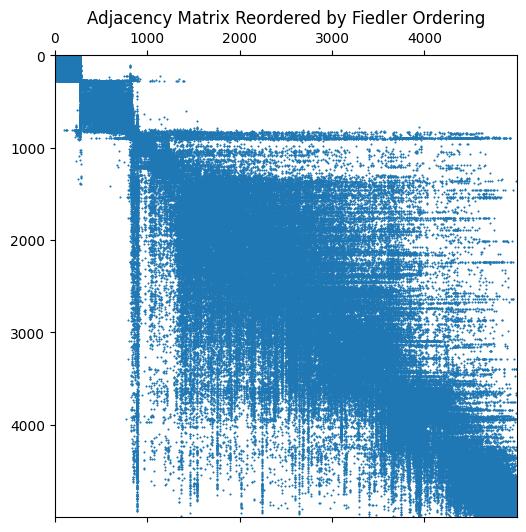

In [91]:
# Reorder A by the Fiedler-based permutation
A_reordered = A[np.ix_(perm, perm)]

# Plot
plt.figure(figsize=(6, 6))
plt.spy(A_reordered, markersize=0.5)
plt.title('Adjacency Matrix Reordered by Fiedler Ordering')
plt.show()

### Interpretation

The **spy plot** of the reordered adjacency matrix reveals **three clear diagonal blocks**:

- A **small, dense block** representing **adult terms**
- A **medium-density block** corresponding to **gambling-related terms**
- A **large, moderately dense block** for **general terms** (finance, travel, tech, etc.)

The **sparse off-diagonal entries** indicate **minimal inter-cluster connections**, confirming that the clusters are **well-separated** and meaningful.

#sklearn SpectralClustering Fallback

In [92]:
from sklearn.cluster import SpectralClustering
from collections import Counter

# Run SpectralClustering on the same adjacency for 3 clusters
sc = SpectralClustering(
    n_clusters=3,
    affinity='precomputed',
    assign_labels='discretize',
    random_state=0
)
labels_skl = sc.fit_predict(A)

# Restrict to term-nodes
term_skl = labels_skl[:n]
print("sklearn term cluster sizes:", Counter(term_skl))

# Show 10 sample terms per cluster
for c in sorted(Counter(term_skl).keys()):
    idxs = np.where(term_skl == c)[0]
    print(f"\nsklearn Cluster {c} examples:", [labels[i] for i in idxs[:10]])

sklearn term cluster sizes: Counter({np.int64(1): 1838, np.int64(0): 586, np.int64(2): 576})

sklearn Cluster 0 examples: ['acapulco hotel\n', 'accommodation\n', 'accommodation hotel\n', 'accommodation las vegas\n', 'accommodation new york\n', 'accommodation orlando\n', 'accommodation paris\n', 'acura cl\n', 'adventure travel\n', 'adventure vacation\n']

sklearn Cluster 1 examples: ['12a1970 lexmark\n', '2 stacker\n', '2nd mortgage\n', 'accept account card credit merchant\n', 'accept card credit\n', 'accept card credit online\n', 'accessory computer\n', 'accessory desk\n', 'account card credit merchant\n', 'account cost low merchant\n']

sklearn Cluster 2 examples: ['21 black jack\n', 'adult\n', 'adult amateur video\n', 'adult entertainment\n', 'adult film\n', 'adult movie\n', 'adult movie sex\n', 'adult movie xxx\n', 'adult picture\n', 'adult porn\n']


### Interpretation

#### Spectral Clustering (3-Way Result):

- **Cluster 0 (586 terms)**: Focused on **travel & hospitality**  
  *(e.g., “acapulco hotel,” “accommodation las vegas”)*
  
- **Cluster 1 (1,838 terms)**: Broad set covering **general commerce & technology**  
  *(e.g., “2nd mortgage,” “accessory computer”)*
  
- **Cluster 2 (576 terms)**: Concentrated on **adult & gambling content**  
  *(e.g., “adult movie,” “21 black jack”)*

This clustering **closely mirrors the manual spectral split**, particularly the **576-term adult/gambling group**, while also **isolating a distinct travel/hospitality cluster** from the larger general category.